## Exercise 2

Consider the grid-world shown in Figure 1. In each (non-grey) cell, it is possible to perform five actions: move up, down, left, right or do nothing as long as the resulting move stays inside the grid world. Grey cells are obstacles and are not allowed. We would like to find the optimal value function and optimal policy that minimize the following cost:

$$
\min \sum_{n} \alpha^n g_n(x_n)
$$

with discount factor $ \alpha = 0.99 $ and where the instantaneous cost is defined as

$$
g_n(x_n) = 
\begin{cases} 
-1 & \text{if } x_n \text{ is a violet cell} \\
0 & \text{if } x_n \text{ is a white cell} \\
1 & \text{if } x_n \text{ is a green cell} \\
10 & \text{if } x_n \text{ is a red cell}
\end{cases}
$$
_________________________________________________________________________________________________________________________________

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

<div><center>
<img src="./Grid.png" width="500"/>
</center></div>

_________________________________________________________________________________________________________________________________
a) Implement the value iteration algorithm to solve the problem (initialize the value function to 0). How many iterations does it take to attain convergence? (we assume here that convergence happens  when all the elements of the value function do not change more than 10−6 in a new iteration.
_________________________________________________________________________________________________________________________________

In [61]:
#constants
white=0
green=1
red=10
violet=-1
alpha=0.99
i=1


# lets create a numpy array of 5X4 size and innitialize the values
array_board=np.zeros(([4,5]),dtype=object)
array_board[3,4]=violet
array_board[0,4]=violet
array_board[1,4]=red
array_board[3,3]=red
array_board[2,1]=red
array_board[0,2]=green
array_board[1,2]=green
array_board[2,3]=green
array_board[3,0]=green
array_board[1,1]='*'
array_board[2,2]='*'

grid=np.zeros(([4,5]),dtype=object)

threshold_matrix=1e-06*np.ones(([4,5]),dtype=float)
threshold_matrix[1,1]=0
threshold_matrix[2,2]=0

print(array_board)
print(type(array_board[1,1]))



[[0 0 1 0 -1]
 [0 '*' 1 0 10]
 [0 10 '*' 1 0]
 [1 0 0 10 -1]]
<class 'str'>


In [62]:
all_less_or_equal = False

while not all_less_or_equal:
    i += 1  # Increment iteration counter at the start of the loop

    # Compute grid based on array_board
    #a_00
    grid[0,0]=min((white+alpha*(array_board[0,0])),(white+alpha*(array_board[1,0])),(white+alpha*(array_board[0,1])))
    #a_01
    grid[0,1]=min((white+alpha*(array_board[0,0])),(white+alpha*(array_board[0,1])),(white+alpha*(array_board[0,2])))
    #a_02----------------->Terminal Cost
    grid[0,2]=min((green+alpha*(array_board[0,1])),(green+alpha*(array_board[0,2])),(green+alpha*(array_board[0,3])),(green+alpha*(array_board[1,2])))
    #a_03
    grid[0,3]=min((white+alpha*(array_board[0,2])),(white+alpha*(array_board[0,3])),(white+alpha*(array_board[1,3])),(white+alpha*(array_board[0,4])))
    #a_04----------------->Terminal Cost
    grid[0,4]=min((violet+alpha*(array_board[0,3])),(violet+alpha*(array_board[0,4])),(violet+alpha*(array_board[1,4])))
    #a_10
    grid[1,0]=min((white+alpha*(array_board[0,0])),(white+alpha*(array_board[1,0])),(white+alpha*(array_board[2,0])))
    #a_11----------------->Not Valid Grid
    #a_12----------------->Terminal Cost
    grid[1,2]=min((green+alpha*(array_board[0,2])),(green+alpha*(array_board[1,2])),(green+alpha*(array_board[1,3])))
    #a_13
    grid[1,3]=min((white+alpha*(array_board[1,2])),(white+alpha*(array_board[0,3])),(white+alpha*(array_board[1,3])),(white+alpha*(array_board[2,3])),(white+alpha*(array_board[1,4])))
    #a_14----------------->Terminal Cost
    grid[1,4]=min((red+alpha*(array_board[0,4])),(red+alpha*(array_board[1,4])),(red+alpha*(array_board[2,4])),(red+alpha*(array_board[1,3])))
    #a_20
    grid[2,0]=min((white+alpha*(array_board[1,0])),(white+alpha*(array_board[2,1])),(white+alpha*(array_board[3,0])),(white+alpha*(array_board[2,0])))
    #a_21----------------->Terminal Cost
    grid[2,1]=min((red+alpha*(array_board[2,0])),(red+alpha*(array_board[2,1])),(red+alpha*(array_board[3,1])))
    #a_22----------------->Not Valid Grid
    #a_23----------------->Terminal Cost
    grid[2,3]=min((green+alpha*(array_board[1,3])),(green+alpha*(array_board[2,3])),(green+alpha*(array_board[3,3])),(green+alpha*(array_board[2,4])))
    #a_24
    grid[2,4]=min((white+alpha*(array_board[2,4])),(white+alpha*(array_board[3,4])),(white+alpha*(array_board[1,4])),(white+alpha*(array_board[2,3])))
    #a_30----------------->Terminal Cost
    grid[3,0]=min((green+alpha*(array_board[2,0])),(green+alpha*(array_board[3,0])),(green+alpha*(array_board[3,1])))
    #a_31
    grid[3,1]=min((white+alpha*(array_board[3,0])),(white+alpha*(array_board[3,1])),(white+alpha*(array_board[2,1])),(white+alpha*(array_board[3,2])))
    #a_32
    grid[3,2]=min((white+alpha*(array_board[3,1])),(white+alpha*(array_board[3,2])),(white+alpha*(array_board[3,3])))
    #a_33----------------->Terminal Cost
    grid[3,3]=min((red+alpha*(array_board[3,2])),(red+alpha*(array_board[3,3])),(red+alpha*(array_board[3,4])),(red+alpha*(array_board[2,3])))
    #a_34----------------->Terminal Cost
    grid[3,4]=min((violet+alpha*(array_board[3,3])),(violet+alpha*(array_board[3,4])),(violet+alpha*(array_board[2,4])))


    # Calculate delta_mat before updating array_board
    delta_mat = np.array([
        [abs(grid[0,0] - array_board[0,0]), abs(grid[0,1] - array_board[0,1]), abs(grid[0,2] - array_board[0,2]), abs(grid[0,3] - array_board[0,3]), abs(grid[0,4] - array_board[0,4])],
        [abs(grid[1,0] - array_board[1,0]), 0, abs(grid[1,2] - array_board[1,2]), abs(grid[1,3] - array_board[1,3]), abs(grid[1,4] - array_board[1,4])],
        [abs(grid[2,0] - array_board[2,0]), abs(grid[2,1] - array_board[2,1]), 0, abs(grid[2,3] - array_board[2,3]), abs(grid[2,4] - array_board[2,4])],
        [abs(grid[3,0] - array_board[3,0]), abs(grid[3,1] - array_board[3,1]), abs(grid[3,2] - array_board[3,2]), abs(grid[3,3] - array_board[3,3]), abs(grid[3,4] - array_board[3,4])]
    ])

    
    # Update array_board after calculating delta_mat
    array_board = grid.copy()

    
    # Check convergence
    comparison = delta_mat <= threshold_matrix
    all_less_or_equal = np.all(comparison)

    if all_less_or_equal == True:
       # Round the new grid values
       grid = np.vectorize(lambda x: round(float(x), 2) if isinstance(x, (int, float)) else x)(grid) 
       grid = np.vectorize(lambda x: round(float(x), 2) if isinstance(x, (int, float)) else x,otypes=[object])(grid)
       grid[1,1]='X'
       grid[2,2]='X'
    
    if i > 2000:
        print("Reached maximum iterations without convergence.")
        break
print(f"Iteration: {i}")
print(grid)    



Iteration: 1376
[[-95.08 -96.04 -97.01 -99.0 -100.0]
 [-94.13 'X' -96.03 -98.01 -89.0]
 [-93.19 -82.26 'X' -97.01 -99.0]
 [-91.26 -90.34 -89.44 -89.0 -100.0]]


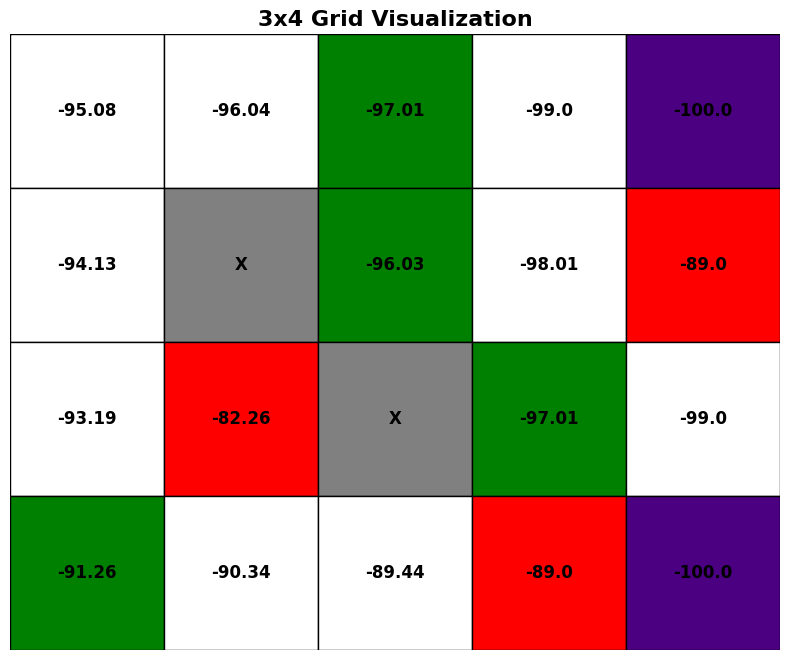

In [63]:
# Identify highest and lowest numeric values
numeric_values = [cell for row in grid for cell in row if isinstance(cell, (int, float))]
highest_value = max(numeric_values)
lowest_value = min(numeric_values)

# Define grid size
rows, cols = grid.shape

action_symbols = {
    'up':    '↑',
    'down':  '↓',
    'left':  '←',
    'right': '→',
    'stay':  '·'
}

# Create a color map based on the rules
def get_cell_color(i,j):
    if (i == 0 and j == 2) | (i == 1 and j == 2) | (i == 2 and j == 3) | (i == 3 and j == 0):
        
        return 'green'
    elif (i == 2 and j == 1) | (i == 1 and j == 4) | (i == 3 and j == 3):
        
        return 'red'
    elif (i == 1 and j == 1) | (i == 2 and j == 2):
        
        return 'grey'
    elif (i == 0 and j == 4) | (i == 3 and j == 4):
        
        return '#4B0082' 
    else:
        return 'white'

# Create the plot
fig, ax = plt.subplots(figsize=(cols * 2, rows * 2))  # Adjust figsize for better visibility

# Draw the grid
for i in range(rows):
    for j in range(cols):
        cell = grid[i, j]
        color = get_cell_color(i,j)
                
        # Create a rectangle for each cell
        rect = patches.Rectangle((j, rows - i - 1), 1, 1, linewidth=1, edgecolor='black', facecolor=color)
        ax.add_patch(rect)
        
        # Add text annotation
        ax.text(j + 0.5, rows - i - 0.5, str(cell), 
                horizontalalignment='center', verticalalignment='center', 
                fontsize=12, fontweight='bold')

# Set the limits and aspect
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)
ax.set_aspect('equal')

# Add grid lines for better visualization
ax.set_xticks(np.arange(0, cols + 1, 1))
ax.set_yticks(np.arange(0, rows + 1, 1))
ax.grid(which='both', color='black', linewidth=1)

# Remove axes labels
ax.axis('off')

# Add a title
plt.title('3x4 Grid Visualization', fontsize=16, fontweight='bold')

# Display the plot
plt.show()

_________________________________________________________________________________________________________________________________
b) Implement the policy iteration algorithm to solve the problem (use the version that solves the linear equation $(I - \alpha A)J\mu = \bar{g}$). Start with an initial policy that does not move. How many iterations does it take to converge?
_________________________________________________________________________________________________________________________________

In [64]:
# Define constants
iteration=1

# Initialize matrices
A = np.zeros([18,18])
I = np.eye(18, 18)
g_bar = np.array([
    [0],
    [0],
    [1],
    [0],
    [-1],
    [0],
    [1],
    [0],
    [10],
    [0],
    [10],
    [1],
    [0],
    [1],
    [0],
    [0],
    [10],
    [-1]
])

J_mu_compar=np.zeros([4,5])

all_less_or_equal = False

while not all_less_or_equal:
    iteration += 1  # Increment iteration counter at the start of the loop
    
    k = I - alpha * A

    # Solve for J_mu
    J_mu = np.linalg.solve(k, g_bar)
    J_mu = np.insert(J_mu, 6, 0)
    J_mu = np.insert(J_mu, 12, 0)
    J_mu = J_mu.reshape(4, 5)
    # print("Initial J_μ:")
    # print(J_mu)

    # Initialize J_mu_curr and J_mu_index
    J_mu_curr = np.zeros((4, 5), dtype=object)
    J_mu_index = np.zeros((4, 5), dtype=int)

    # Define expressions and compute min and index for each cell
    # a_00
    expressions = [
        white + alpha * J_mu[0, 0],  # Option 0
        white + alpha * J_mu[1, 0],  # Option 1
        white + alpha * J_mu[0, 1]   # Option 2
    ]
    J_mu_curr[0, 0] = min(expressions)
    J_mu_index[0, 0] = expressions.index(J_mu_curr[0, 0])

    # a_01
    expressions = [
        white + alpha * J_mu[0, 0],  # Option 0
        white + alpha * J_mu[0, 1],  # Option 1
        white + alpha * J_mu[0, 2]   # Option 2
    ]
    J_mu_curr[0, 1] = min(expressions)
    J_mu_index[0, 1] = expressions.index(J_mu_curr[0, 1])

    # a_02 (Terminal Cost)
    expressions = [
        green + alpha * J_mu[0, 1],  # Option 0
        green + alpha * J_mu[0, 2],  # Option 1
        green + alpha * J_mu[0, 3],  # Option 2
        green + alpha * J_mu[1, 2]   # Option 3
    ]
    J_mu_curr[0, 2] = min(expressions)
    J_mu_index[0, 2] = expressions.index(J_mu_curr[0, 2])

    # a_03
    expressions = [
        white + alpha * J_mu[0, 2],  # Option 0
        white + alpha * J_mu[0, 3],  # Option 1
        white + alpha * J_mu[1, 3],  # Option 2
        white + alpha * J_mu[0, 4]   # Option 3
    ]
    J_mu_curr[0, 3] = min(expressions)
    J_mu_index[0, 3] = expressions.index(J_mu_curr[0, 3])

    # a_04 (Terminal Cost)
    expressions = [
        violet + alpha * J_mu[0, 3],  # Option 0
        violet + alpha * J_mu[0, 4],  # Option 1
        violet + alpha * J_mu[1, 4]   # Option 2
    ]
    J_mu_curr[0, 4] = min(expressions)
    J_mu_index[0, 4] = expressions.index(J_mu_curr[0, 4])

    # a_10
    expressions = [
        white + alpha * J_mu[0, 0],  # Option 0
        white + alpha * J_mu[1, 0],  # Option 1
        white + alpha * J_mu[2, 0]   # Option 2
    ]
    J_mu_curr[1, 0] = min(expressions)
    J_mu_index[1, 0] = expressions.index(J_mu_curr[1, 0])

    # a_12 (Terminal Cost)
    expressions = [
        green + alpha * J_mu[0, 2],  # Option 0
        green + alpha * J_mu[1, 2],  # Option 1
        green + alpha * J_mu[1, 3]   # Option 2
    ]
    J_mu_curr[1, 2] = min(expressions)
    J_mu_index[1, 2] = expressions.index(J_mu_curr[1, 2])

    # a_13
    expressions = [
        white + alpha * J_mu[1, 2],  # Option 0
        white + alpha * J_mu[0, 3],  # Option 1
        white + alpha * J_mu[1, 3],  # Option 2
        white + alpha * J_mu[2, 3],  # Option 3
        white + alpha * J_mu[1, 4]   # Option 4
    ]
    J_mu_curr[1, 3] = min(expressions)
    J_mu_index[1, 3] = expressions.index(J_mu_curr[1, 3])

    # a_14 (Terminal Cost)
    expressions = [
        red + alpha * J_mu[0, 4],    # Option 0
        red + alpha * J_mu[1, 4],    # Option 1
        red + alpha * J_mu[2, 4],    # Option 2
        red + alpha * J_mu[1, 3]     # Option 3
    ]
    J_mu_curr[1, 4] = min(expressions)
    J_mu_index[1, 4] = expressions.index(J_mu_curr[1, 4])

    # a_20
    expressions = [
        white + alpha * J_mu[1, 0],  # Option 0
        white + alpha * J_mu[2, 1],  # Option 1
        white + alpha * J_mu[3, 0],  # Option 2
        white + alpha * J_mu[2, 0]   # Option 3
    ]
    J_mu_curr[2, 0] = min(expressions)
    J_mu_index[2, 0] = expressions.index(J_mu_curr[2, 0])

    # a_21 (Terminal Cost)
    expressions = [
        red + alpha * J_mu[2, 0],  # Option 0
        red + alpha * J_mu[2, 1],  # Option 1
        red + alpha * J_mu[3, 1]   # Option 2
    ]
    J_mu_curr[2, 1] = min(expressions)
    J_mu_index[2, 1] = expressions.index(J_mu_curr[2, 1])

    # a_23 (Terminal Cost)
    expressions = [
        green + alpha * J_mu[1, 3],  # Option 0
        green + alpha * J_mu[2, 3],  # Option 1
        green + alpha * J_mu[3, 3],  # Option 2
        green + alpha * J_mu[2, 4]   # Option 3
    ]
    J_mu_curr[2, 3] = min(expressions)
    J_mu_index[2, 3] = expressions.index(J_mu_curr[2, 3])

    # a_24
    expressions = [
        white + alpha * J_mu[2, 4],  # Option 0
        white + alpha * J_mu[3, 4],  # Option 1
        white + alpha * J_mu[1, 4],  # Option 2
        white + alpha * J_mu[2, 3]   # Option 3
    ]
    J_mu_curr[2, 4] = min(expressions)
    J_mu_index[2, 4] = expressions.index(J_mu_curr[2, 4])

    # a_30 (Terminal Cost)
    expressions = [
        green + alpha * J_mu[2, 0],  # Option 0
        green + alpha * J_mu[3, 0],  # Option 1
        green + alpha * J_mu[3, 1]   # Option 2
    ]
    J_mu_curr[3, 0] = min(expressions)
    J_mu_index[3, 0] = expressions.index(J_mu_curr[3, 0])

    # a_31
    expressions = [
        white + alpha * J_mu[3, 0],  # Option 0
        white + alpha * J_mu[3, 1],  # Option 1
        white + alpha * J_mu[2, 1],  # Option 2
        white + alpha * J_mu[3, 2]   # Option 3
    ]
    J_mu_curr[3, 1] = min(expressions)
    J_mu_index[3, 1] = expressions.index(J_mu_curr[3, 1])

    # a_32
    expressions = [
        white + alpha * J_mu[3, 1],  # Option 0
        white + alpha * J_mu[3, 2],  # Option 1
        white + alpha * J_mu[3, 3]   # Option 2
    ]
    J_mu_curr[3, 2] = min(expressions)
    J_mu_index[3, 2] = expressions.index(J_mu_curr[3, 2])

    # a_33 (Terminal Cost)
    expressions = [
        red + alpha * J_mu[3, 2],  # Option 0
        red + alpha * J_mu[3, 3],  # Option 1
        red + alpha * J_mu[3, 4],  # Option 2
        red + alpha * J_mu[2, 3]   # Option 3
    ]
    J_mu_curr[3, 3] = min(expressions)
    J_mu_index[3, 3] = expressions.index(J_mu_curr[3, 3])

    # a_34 (Terminal Cost)
    expressions = [
        violet + alpha * J_mu[3, 3],  # Option 0
        violet + alpha * J_mu[3, 4],  # Option 1
        violet + alpha * J_mu[2, 4]   # Option 2
    ]
    J_mu_curr[3, 4] = min(expressions)
    J_mu_index[3, 4] = expressions.index(J_mu_curr[3, 4])

    # Define mappings for each cell
    mappings = {
        (0, 0): [(0, 0), (1, 0), (0, 1)],
        (0, 1): [(0, 0), (0, 1), (0, 2)],
        (0, 2): [(0, 1), (0, 2), (0, 3), (1, 2)],
        (0, 3): [(0, 2), (0, 3), (1, 3), (0, 4)],
        (0, 4): [(0, 3), (0, 4), (1, 4)],
        (1, 0): [(0, 0), (1, 0), (2, 0)],
        (1, 2): [(0, 2), (1, 2), (1, 3)],
        (1, 3): [(1, 2), (0, 3), (1, 3), (2, 3), (1, 4)],
        (1, 4): [(0, 4), (1, 4), (2, 4), (1, 3)],
        (2, 0): [(1, 0), (2, 1), (3, 0), (2, 0)],
        (2, 1): [(2, 0), (2, 1), (3, 1)],
        (2, 3): [(1, 3), (2, 3), (3, 3), (2, 4)],
        (2, 4): [(2, 4), (3, 4), (1, 4), (2, 3)],
        (3, 0): [(2, 0), (3, 0), (3, 1)],
        (3, 1): [(3, 0), (3, 1), (2, 1), (3, 2)],
        (3, 2): [(3, 1), (3, 2), (3, 3)],
        (3, 3): [(3, 2), (3, 3), (3, 4), (2, 3)],
        (3, 4): [(3, 3), (3, 4), (2, 4)]
    }

    # Initialize a matrix to store the selected J_mu positions
    J_mu_selected_positions = np.empty((4, 5), dtype=object)

    # Iterate through each cell to map the min index to J_mu positions
    for (i, j), exprs in mappings.items():
        min_index = J_mu_index[i, j]
        selected_position = mappings[(i, j)][min_index]
        J_mu_selected_positions[i, j] = selected_position

    # Print the results
    # print("\nJ_μ_curr:")
    # print(J_mu_curr)

    # print("\nJ_mu_index (Indices of Min Expressions):")
    # print(J_mu_index)

    # print("\nJ_mu_selected_positions (Selected (i, j) for Min Expressions):")
    # print(J_mu_selected_positions)

    # Initialize a boolean matrix with the same shape
    match_matrix = np.zeros(J_mu_selected_positions.shape, dtype=bool)




    mappings_sub= {
        (0, 0): 0,
        (0, 1): 1,
        (0, 2): 2,
        (0, 3): 3,
        (0, 4): 4,
        (1, 0): 5,
        (1, 2): 6,
        (1, 3): 7,
        (1, 4): 8,
        (2, 0): 9,
        (2, 1): 10,
        (2, 3): 11,
        (2, 4): 12,
        (3, 0): 13,
        (3, 1): 14,
        (3, 2): 15,
        (3, 3): 16,
        (3, 4): 17
    }

    B= np.zeros([4,5])
    for i in range(18):
        for row in range(4):
            for(col) in range(5):
                elem = J_mu_selected_positions[row, col]
                if elem is not None:
                    # Compare the element tuple with its indices
                    match_matrix[row, col] = (elem == (row, col))

                    if match_matrix[row, col]==False:
                        B[elem[0], elem[1]]=1
                        #print(B)
                        B=B.flatten()
                        #print(B)
                        B = np.delete(B, [6, 12])
                        X=mappings_sub[(row,col)]
                        #print(X)
                        A[X,:len(B)]=B
                        B= np.zeros([4,5])
                    elif match_matrix[row, col]==True:
                        B[row,col]=1
                        #print(B)
                        B=B.flatten()
                        #print(B)
                        B = np.delete(B, [6, 12])
                        X=mappings_sub[(row,col)]
                        #print(X)
                        A[X,:len(B)]=B
                        B= np.zeros([4,5])

                else:
                    # If the element is None, mark as False
                    match_matrix[row, col] = False
    #print(match_matrix)            
    #print(A)
    
    if iteration==1:
        # Calculate delta_mat before updating J_mu
        delta_mat = np.array([
            [abs(J_mu_curr[0,0] - J_mu[0,0]), abs(J_mu_curr[0,1] - J_mu[0,1]), abs(J_mu_curr[0,2] - J_mu[0,2]), abs(J_mu_curr[0,3] - J_mu[0,3]), abs(J_mu_curr[0,4] - J_mu[0,4])],
            [abs(J_mu_curr[1,0] - J_mu[1,0]), 0, abs(J_mu_curr[1,2] - J_mu[1,2]), abs(J_mu_curr[1,3] - J_mu[1,3]), abs(J_mu_curr[1,4] - J_mu[1,4])],
            [abs(J_mu_curr[2,0] - J_mu[2,0]), abs(J_mu_curr[2,1] - J_mu[2,1]), 0, abs(J_mu_curr[2,3] - J_mu[2,3]), abs(J_mu_curr[2,4] - J_mu[2,4])],
            [abs(J_mu_curr[3,0] - J_mu[3,0]), abs(J_mu_curr[3,1] - J_mu[3,1]), abs(J_mu_curr[3,2] - J_mu[3,2]), abs(J_mu_curr[3,3] - J_mu[3,3]), abs(J_mu_curr[3,4] - J_mu[3,4])]
        ])
    else:
        delta_mat = np.array([
            [abs(J_mu_curr[0,0] - J_mu_compar[0,0]), abs(J_mu_curr[0,1] - J_mu_compar[0,1]), abs(J_mu_curr[0,2] - J_mu_compar[0,2]), abs(J_mu_curr[0,3] - J_mu_compar[0,3]), abs(J_mu_curr[0,4] - J_mu_compar[0,4])],
            [abs(J_mu_curr[1,0] - J_mu_compar[1,0]), 0, abs(J_mu_curr[1,2] - J_mu_compar[1,2]), abs(J_mu_curr[1,3] - J_mu_compar[1,3]), abs(J_mu_curr[1,4] - J_mu_compar[1,4])],
            [abs(J_mu_curr[2,0] - J_mu_compar[2,0]), abs(J_mu_curr[2,1] - J_mu_compar[2,1]), 0, abs(J_mu_curr[2,3] - J_mu_compar[2,3]), abs(J_mu_curr[2,4] - J_mu_compar[2,4])],
            [abs(J_mu_curr[3,0] - J_mu_compar[3,0]), abs(J_mu_curr[3,1] - J_mu_compar[3,1]), abs(J_mu_curr[3,2] - J_mu_compar[3,2]), abs(J_mu_curr[3,3] - J_mu_compar[3,3]), abs(J_mu_curr[3,4] - J_mu_compar[3,4])]
        ])
        
    
    # Update J_mu after calculating delta_mat
    J_mu_compar = J_mu_curr.copy()
    
    # Check convergence
    comparison = delta_mat <= threshold_matrix
    all_less_or_equal = np.all(comparison)
    if all_less_or_equal == True:
       # Round the new J_mu_curr values
       J_mu_curr = np.vectorize(lambda x: round(float(x), 2) if isinstance(x, (int, float)) else x)(J_mu_curr) 
       J_mu_curr = np.vectorize(lambda x: round(float(x), 2) if isinstance(x, (int, float)) else x,otypes=[object])(J_mu_curr)
       J_mu_curr[1,1]='X'
       J_mu_curr[2,2]='X'
    
    if iteration > 2000:
        print("Reached maximum iterations without convergence.")
        break
    

print(f"Iteration: {iteration}")
print(J_mu_curr)   
print(A)


Iteration: 9
[[-95.08 -96.04 -97.01 -99.0 -100.0]
 [-94.13 'X' -96.03 -98.01 -89.0]
 [-93.19 -82.26 'X' -97.01 -99.0]
 [-91.26 -90.34 -89.44 -89.0 -100.0]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

In [ ]:
# Verification------------------> Of A Results

I=np.eye(18,18)
g_bar=([
       [0],
       [0],
       [1],
       [0],
       [-1],
       [0],
       [1],
       [0],
       [10],
       [0],
       [10],
       [1],
       [0],
       [1],
       [0],
       [0],
       [10],
       [-1]
])

A=np.zeros([18,18]) 
A[0,1]=1
A[1,2]=1
A[2,3]=1
A[3,4]=1
A[4,4]=1
A[5,0]=1
A[6,7]=1
A[7,3]=1
A[8,4]=1
A[9,5]=1
A[10,9]=1
A[11,12]=1
A[12,17]=1
A[13,9]=1
A[14,13]=1
A[15,14]=1
A[16,17]=1
A[17,17]=1


k=I-alpha*A

print(A)
J_u=np.linalg.solve(k,g_bar)
print(J_u)

_________________________________________________________________________________________________________________________________
c) Compare the solutions and convergence/complexity of each algorithm to solve this problem.
_________________________________________________________________________________________________________________________________

1. **Convergence and Complexity**
   - **Value Iteration**: Since this method only updates the value function directly, it often requires more iterations to converge, but each iteration is computationally simple as it involves updating values based on expected costs. The complexity per iteration is lower.
   - **Policy Iteration**: Although policy iteration often converges in fewer iterations because each iteration involves a full evaluation of the policy, it requires solving a linear system in each iteration, which is computationally more intensive than a single update in value iteration.

2. **Practical Outcomes**
   - **Value Iteration** might take more iterations but less computation time per iteration, making it suitable for large state spaces where simplicity per step is essential.
   - **Policy Iteration** generally converges faster in terms of iterations but could be slower for very large state spaces due to the need for matrix inversion or solving a linear system.



---